In [1]:
#%matplotlib inline              #Import libraries

import numpy as np
import random  
import matplotlib.pyplot as plt
import math 
import time
import pandas as pd
import copy

In [2]:
#Number of candidates
n_cand=int(input("Number of Candidates:"))

#Arena Size
l=int(input("Length of Arena:"))
b=int(input("Breadth of Arena:"))

#Number of obstacles (2 for boundary)
n=6

#Step length for candidates as well as obstacles
step=float(math.sqrt(l**2+b**2)/50)
step_o=step

#Rectangles list to store obstacle positions
rectconf=[]
vir_rectconf=[]

#Obstacle generation function 
def obstacle(rect,vir_rect):
    for i in range(0,n-2):
        rect_x=random.uniform(0,4.4)
        rect_y=random.uniform(0,4.4)
        wd=random.uniform(0.8,1.0)
        ht=random.uniform(0.8,1.5)
        angle=random.randint(0,45)
        
        rect.append([rect_x,rect_y,wd,ht,angle])
        
        cos=(math.cos(math.radians(45)+math.radians(rect[i][4])))
        sin=(math.sin(math.radians(45)+math.radians(rect[i][4])))
        
        d=2*step
        
        rl=rect[i][2]-2*d
        rb=rect[i][3]-2*d
        Ax=rect[i][0]+(d*math.sqrt(2)*cos)
        Ay=rect[i][1]+(d*math.sqrt(2)*sin)
        
        vir_rect.append([Ax,Ay,rl,rb,angle])
        
    rect.append([-l,-b,2*l,b,0])
    rect.append([-l,-b,l,2*b,0])
    
    return rect,vir_rect
   
rectconf,vir_rectconf=obstacle(rectconf,vir_rectconf)                                                      #Function call

#Dot product function   
def dot(x1,y1,x2,y2):                                                       
    return x1*x2+y1*y2

#Check function to detect the obstacle
def check(rect,xc,yc):
    flag=0
    for j in range(n):
        cos=abs(math.cos(math.radians(rect[j][4])))
        sin=abs(math.sin(math.radians(rect[j][4])))
        Ax=rect[j][0]
        Ay=rect[j][1]
        Bx=rect[j][0]+((cos)*rect[j][2])
        By=rect[j][1]+((sin)*rect[j][2])
        Dx=rect[j][0]-(rect[j][3]*(sin))
        Dy=rect[j][1]+(rect[j][3]*(cos))
    
        (AMX,AMY)=(xc-Ax,yc-Ay)
        (ABX,ABY)=(Bx-Ax,By-Ay)
        (ADX,ADY)=(Dx-Ax,Dy-Ay)
        
        amab=dot(AMX,AMY,ABX,ABY)
        amad=dot(AMX,AMY,ADX,ADY)
        abab=dot(ABX,ABY,ABX,ABY)
        adad=dot(ADX,ADY,ADX,ADY)
        
        amab=round(amab,3)
        amad=round(amad,3)
        abab=round(abab,3)
        adad=round(adad,3)
        
    
        if (amab>0 and amab<abab and amad>0 and amad<adad and amab!=abab and amad!=adad ):                                                           #
            flag=1
            #print("Obstacle Detected!")            
            break
    return flag,j


xconf=[]
yconf=[]
 
#Initial configuration of each candidate
for i in range(n_cand):
    flag=0
    while(flag==0):
        temp_x=np.random.uniform(0,l)
        temp_y=np.random.uniform(0,b)
        v,rec=check(rectconf,temp_x,temp_y)
        
        if(v==0):
            flag=1
            xconf.append(temp_x)
            yconf.append(temp_y)
        else:
            flag=0
            
print("X",xconf)
print("Y",yconf)
print("Rect",rectconf)
print("Vir_rect",vir_rectconf)

print(step)

tim=[]
dist=[]
itr=[]

Number of Candidates:5
Length of Arena:5
Breadth of Arena:5
X [3.027418941258635, 1.7469912829463556, 0.8794040732296421, 4.21012380107887, 0.8215212430833158]
Y [2.9034936406796947, 3.426211924189358, 3.652089136781016, 3.6808684806992042, 2.614408580066972]
Rect [[3.1102987671239903, 2.838363979460961, 0.9091085895379558, 0.9782641053286012, 23], [0.03953303577840126, 2.3116816272016525, 0.8702725367428007, 1.3063854946176852, 25], [0.06378831497068581, 4.101026042276435, 0.8422788306504237, 1.2901618347372752, 26], [2.1028498803028253, 0.38299158985152587, 0.8048414524985819, 0.8708418022988871, 5], [-5, -5, 10, 5, 0], [-5, -5, 5, 10, 0]]
Vir_rect [[3.2601414044903554, 3.209237521287676, 0.3434231645887178, 0.4125786803793632, 23], [0.1763410931086688, 2.6875586755160157, 0.3045871117935627, 0.7407000696684471, 25], [0.19401557675354852, 4.479233472516162, 0.27659340570118573, 0.7244764097880372, 26], [2.359964924177441, 0.689409367099117, 0.23915602754934384, 0.30515637734964907, 5

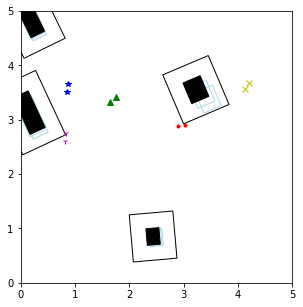

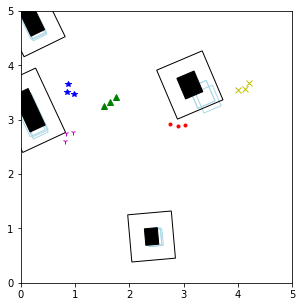

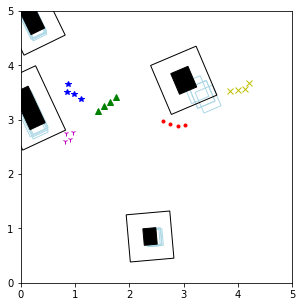

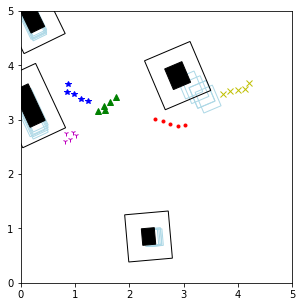

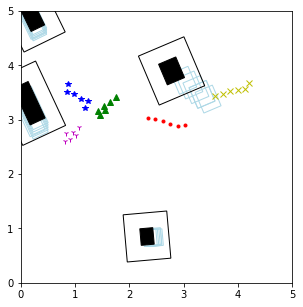

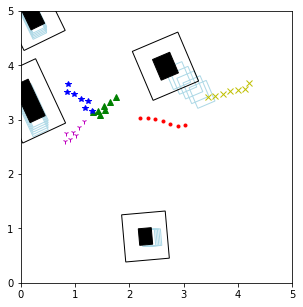

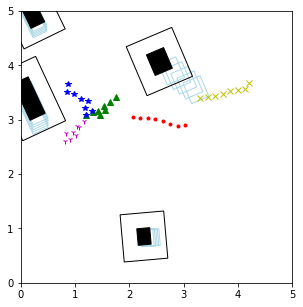

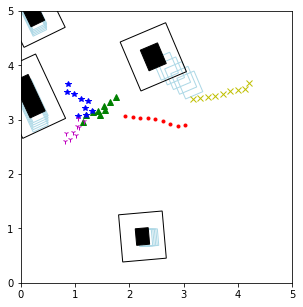

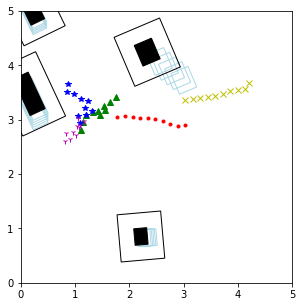

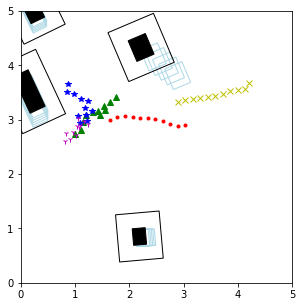

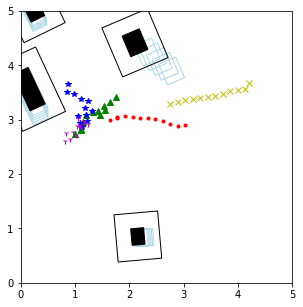

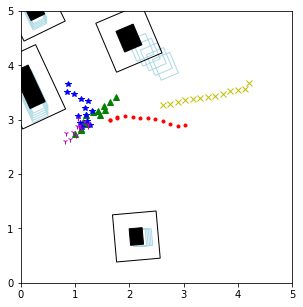

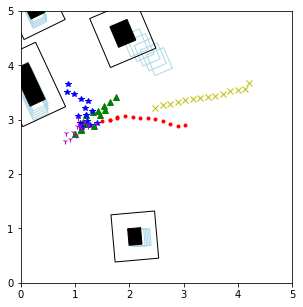

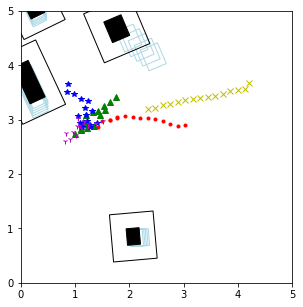

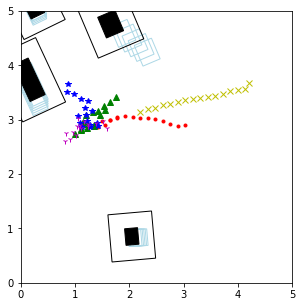

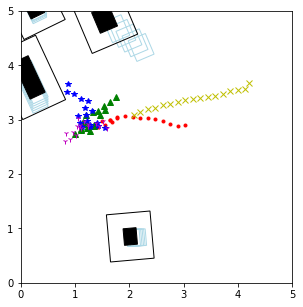

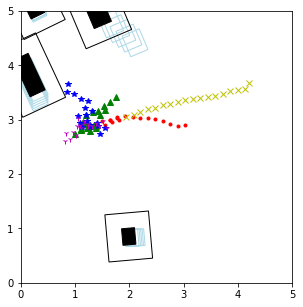

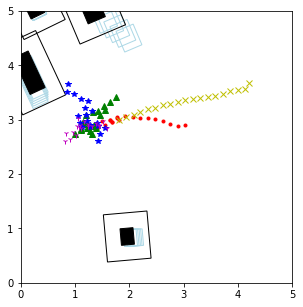

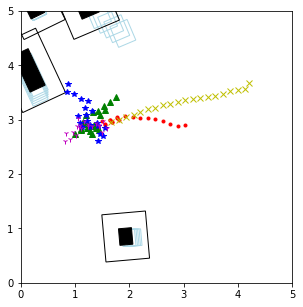

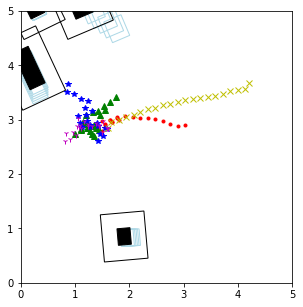

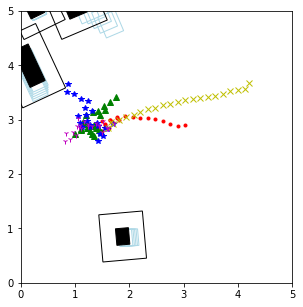

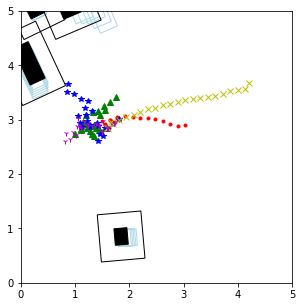

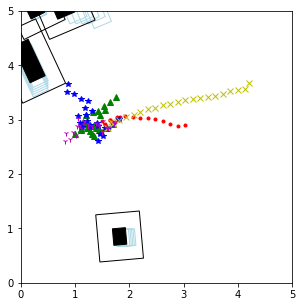

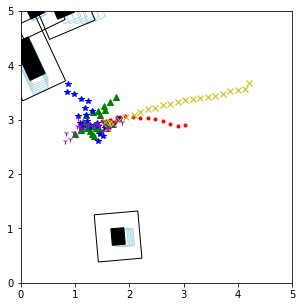

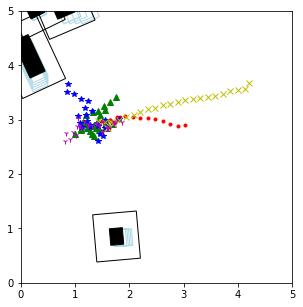

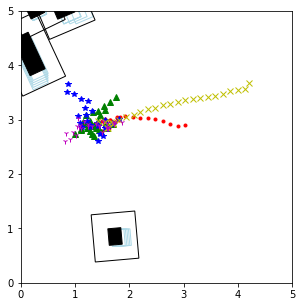

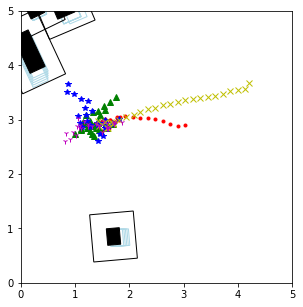

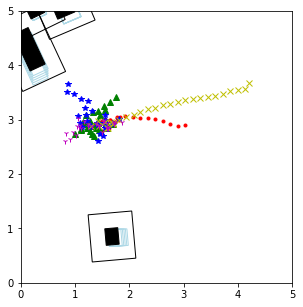

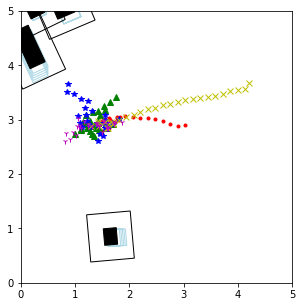

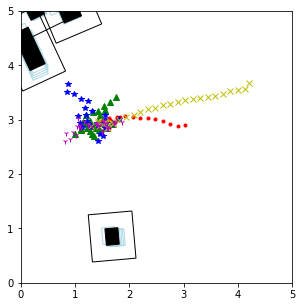

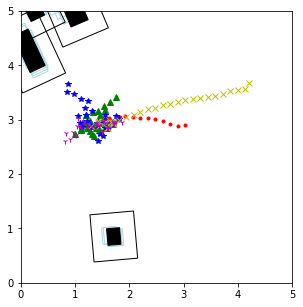

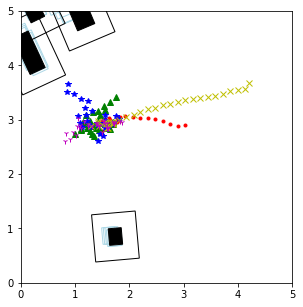

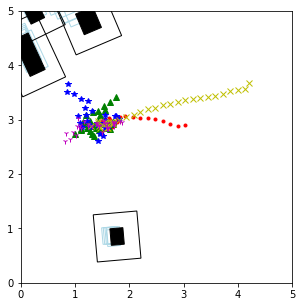

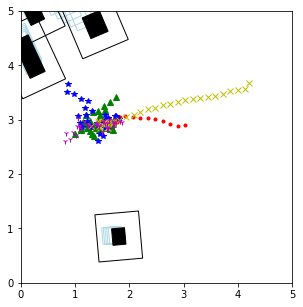

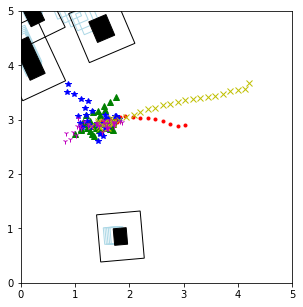

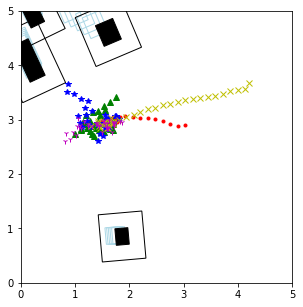

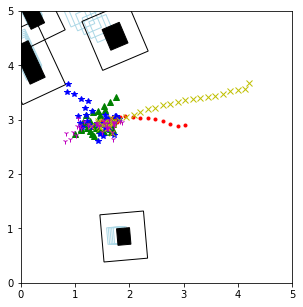

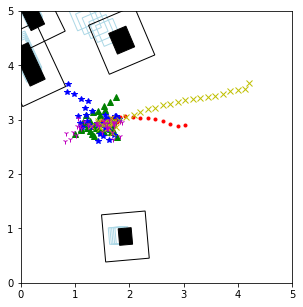

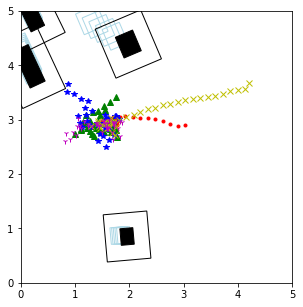

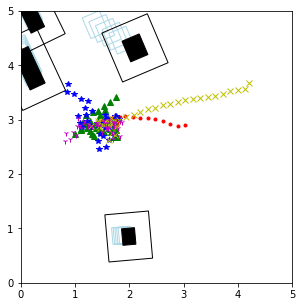

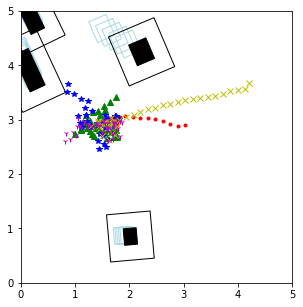

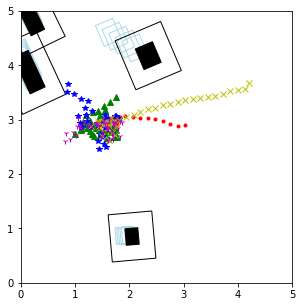

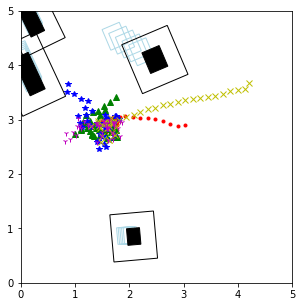

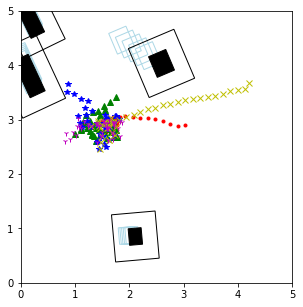

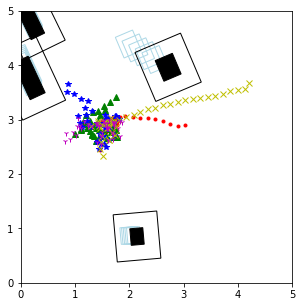

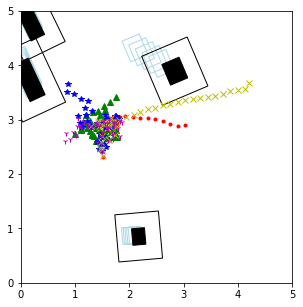

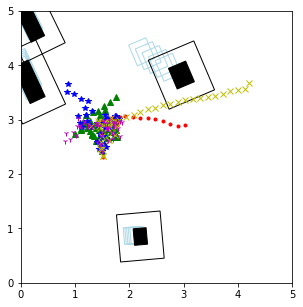

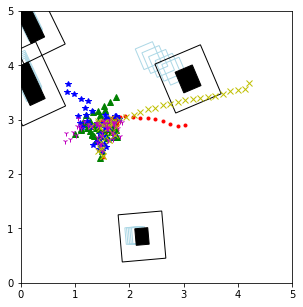

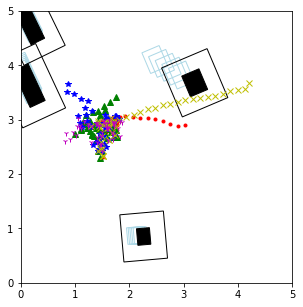

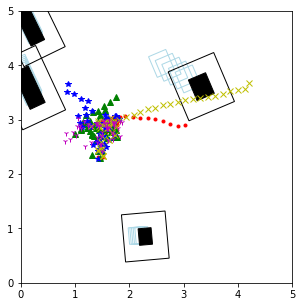

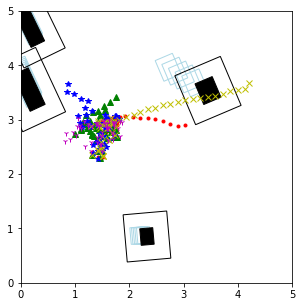

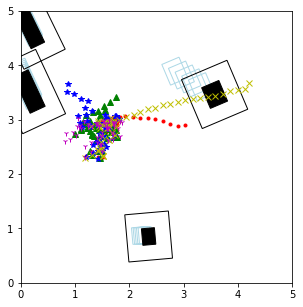

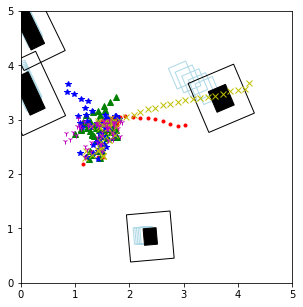

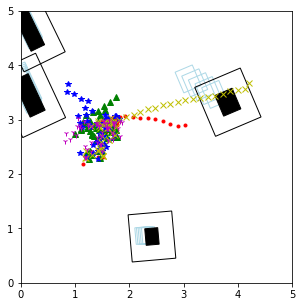

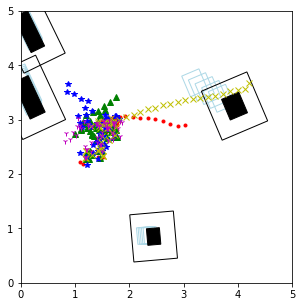

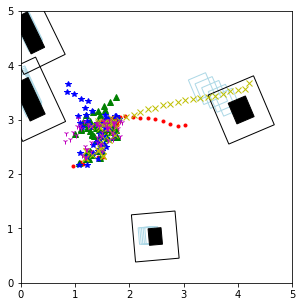

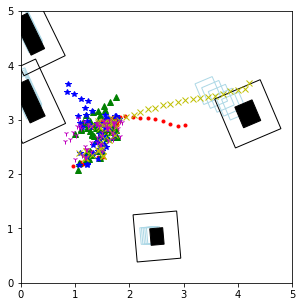

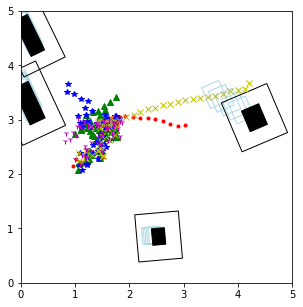

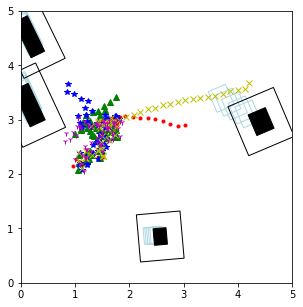

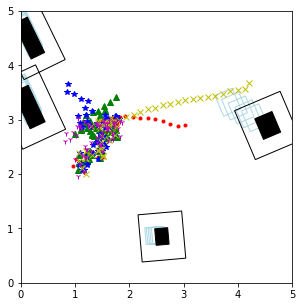

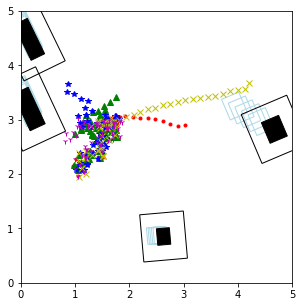

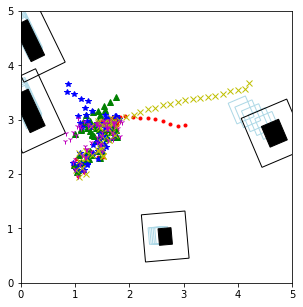

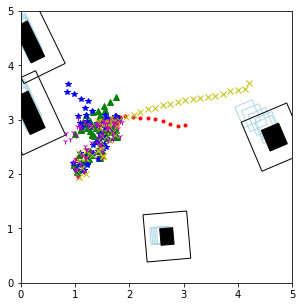

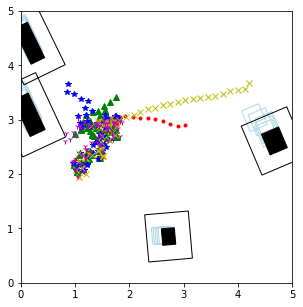

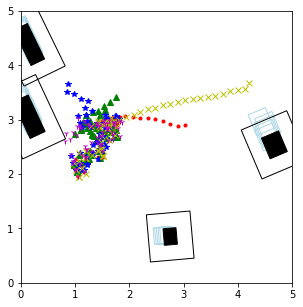

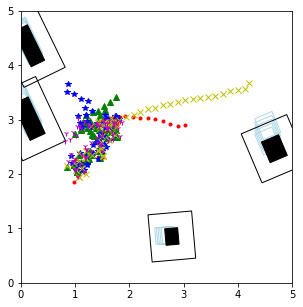

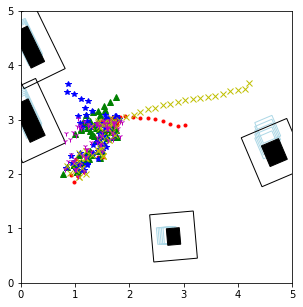

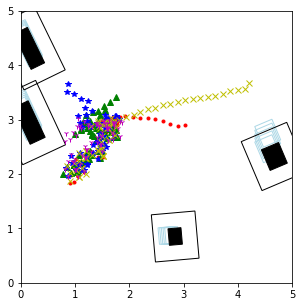

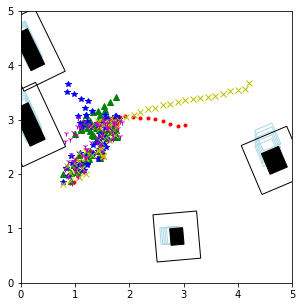

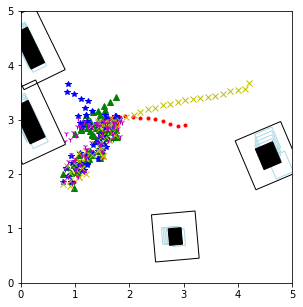

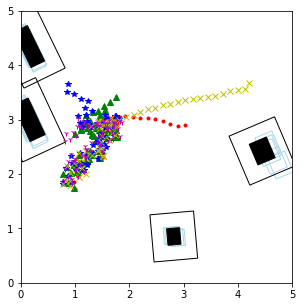

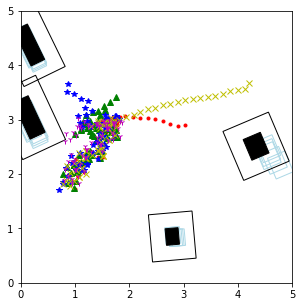

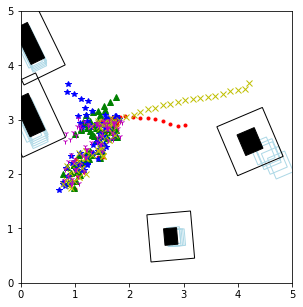

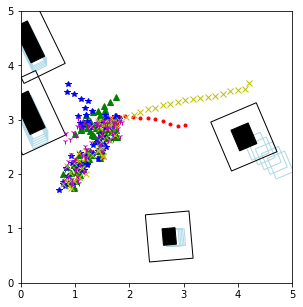

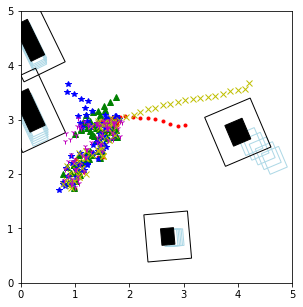

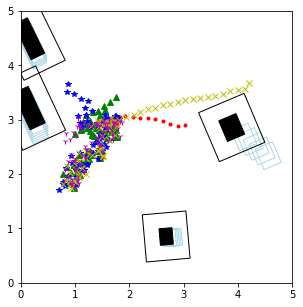

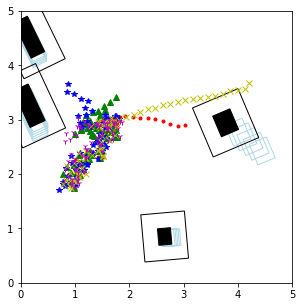

Perturb!


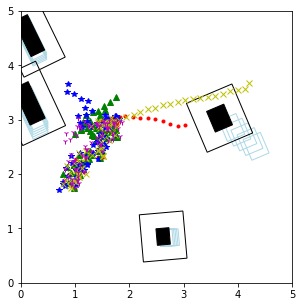

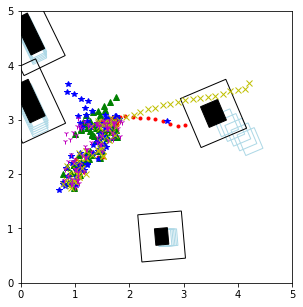

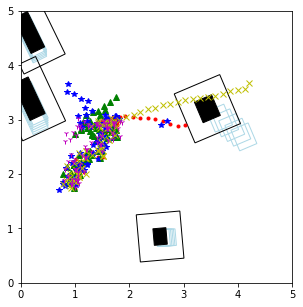

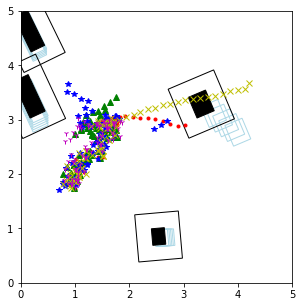

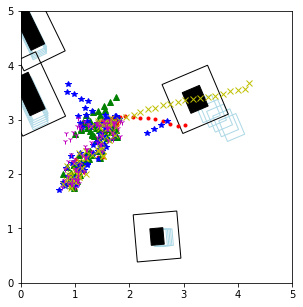

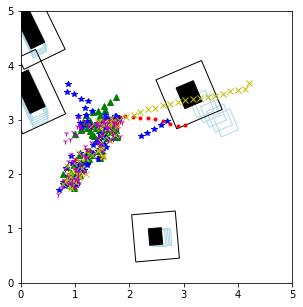

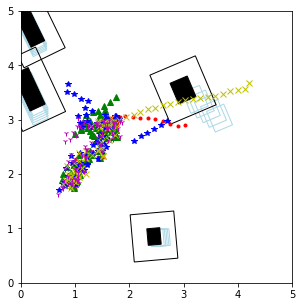

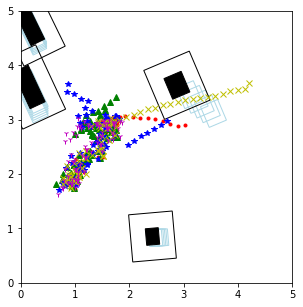

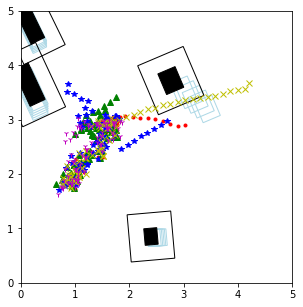

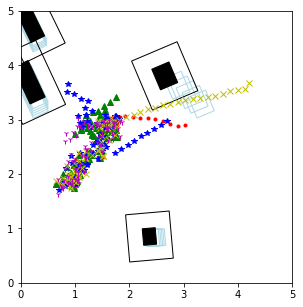

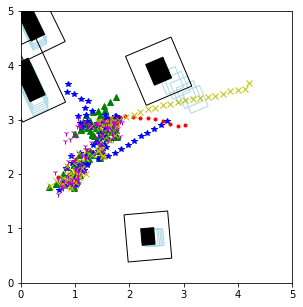

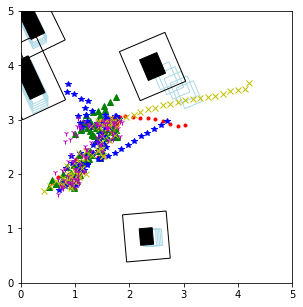

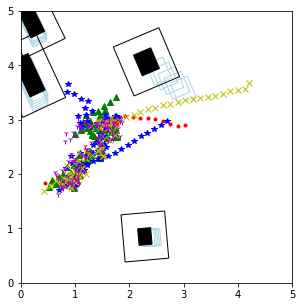

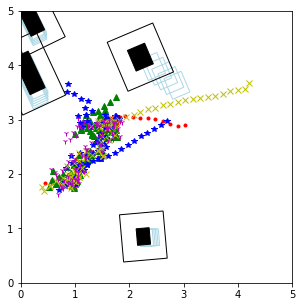

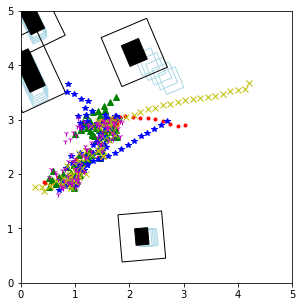

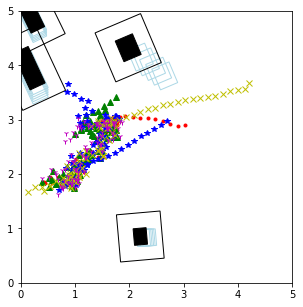

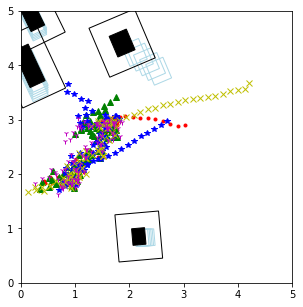

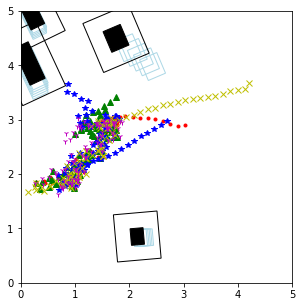

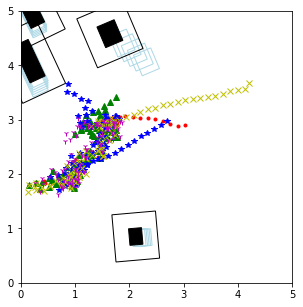

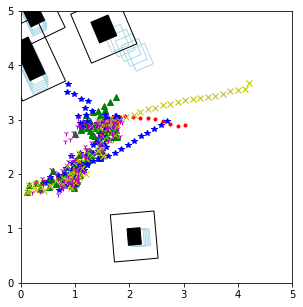

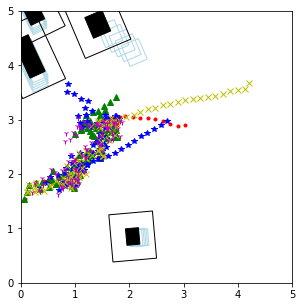

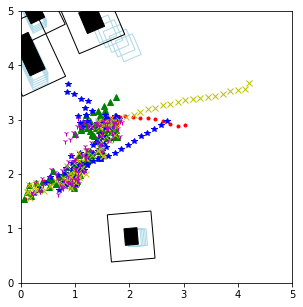

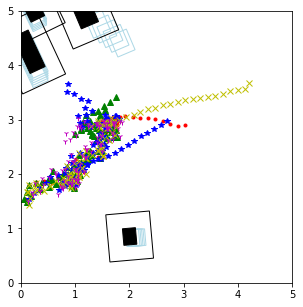

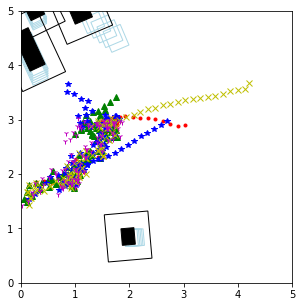

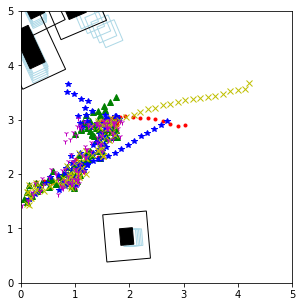

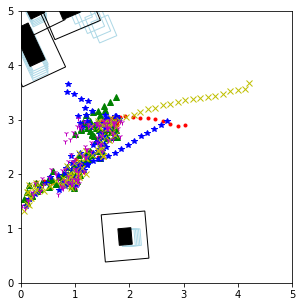

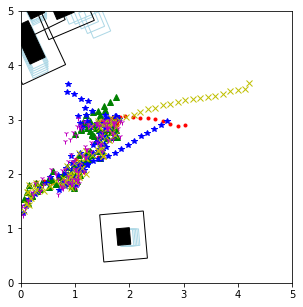

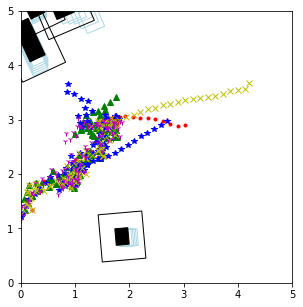

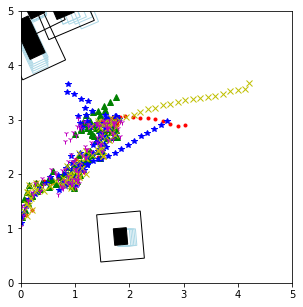

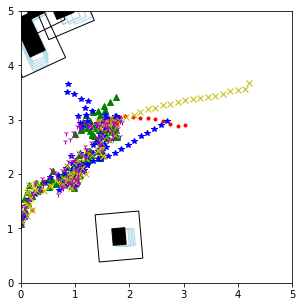

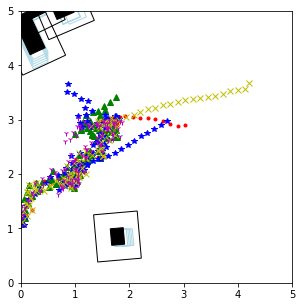

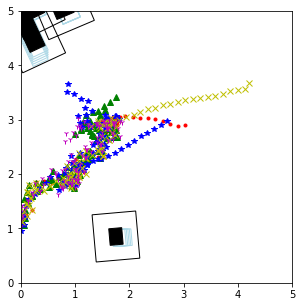

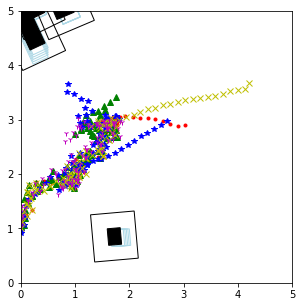

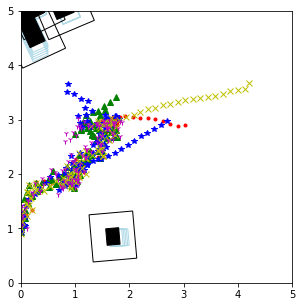

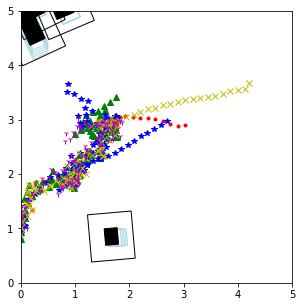

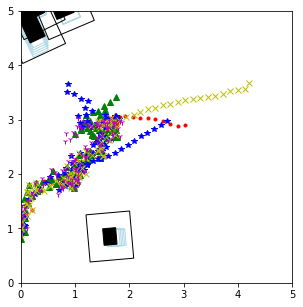

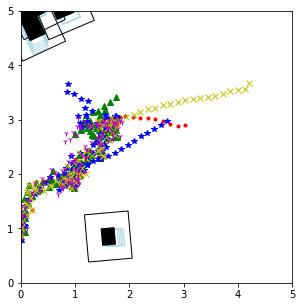

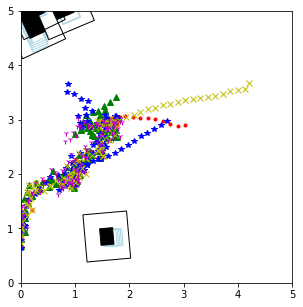

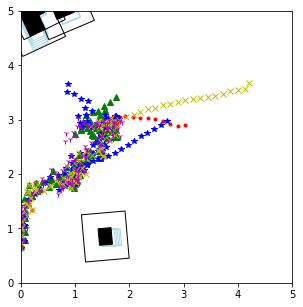

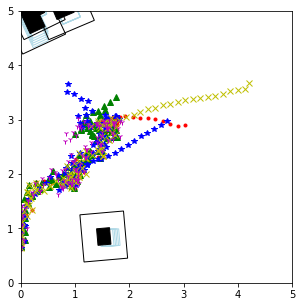

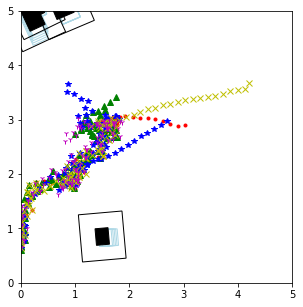

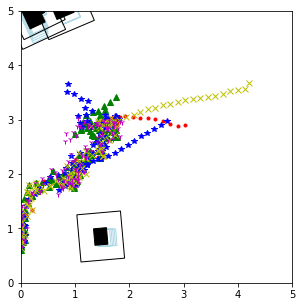

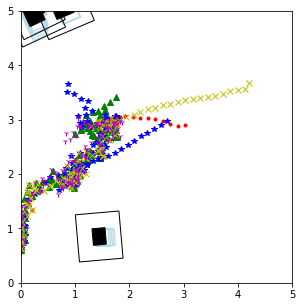

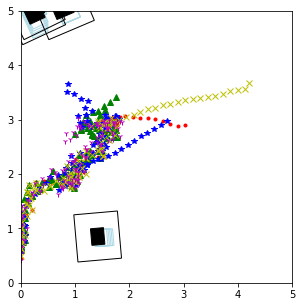

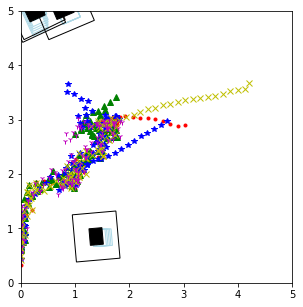

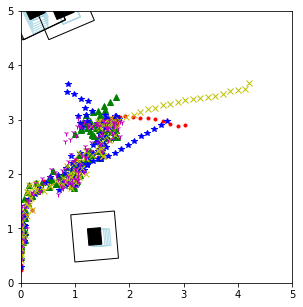

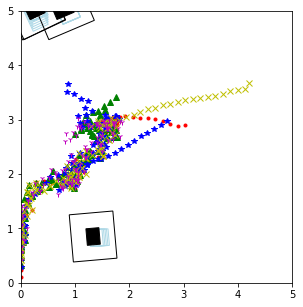

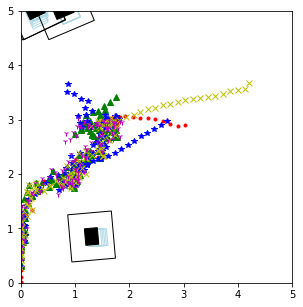

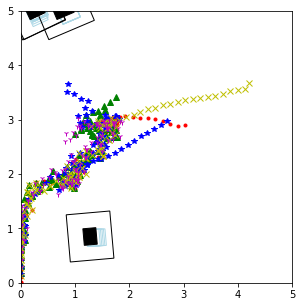

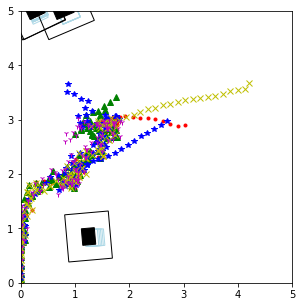

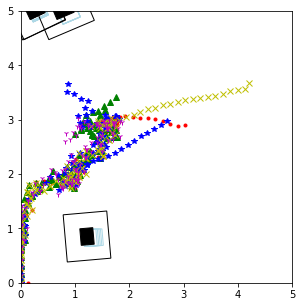

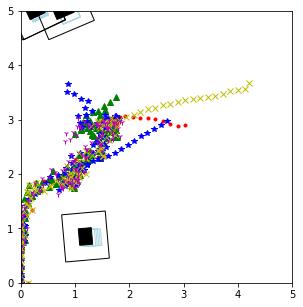

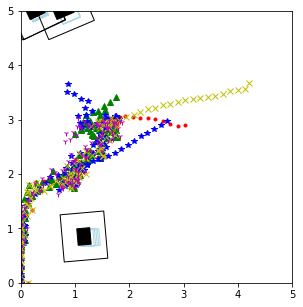

In [7]:
x=[]
y=[]
x.extend(xconf)                                                     #Appending initial configurations
y.extend(yconf)

rect=[]
vir_rect=[]
rect=copy.deepcopy(rectconf)
vir_rect=copy.deepcopy(vir_rectconf)

pos=[]
for i in range (len(vir_rect)):
    pos.append(vir_rectconf[i])

a1=random.uniform(0,math.pi/2)
b1=random.uniform(math.pi/2,math.pi)
c1=random.uniform(math.pi,(3*math.pi)/2)
d1=random.uniform((3*math.pi)/2,2*math.pi)

choice1=[a1,b1,c1,d1]
aa=choice1[random.randint(0,3)]
bb=choice1[random.randint(0,3)]
cc=choice1[random.randint(0,3)]
dd=choice1[random.randint(0,3)]
                                                                    #Light intensity function
def light_int():
    Li=[]
    d=[]
    for i in range(n_cand):
        dist=(x[i]**2)+(y[i]**2)
        d.append(math.sqrt(dist))
        #print(d)
        if dist!=0:
            Li.append(1/dist)
        else:
            Li.append(999)
    return Li,d

                        
line_in=[]
                                                                     #Coordinates of all vertices of obstacle
def line1(rect):
    line=[]
    for j in range(n): 
        cos=abs(math.cos(math.radians(rect[j][4])))
        sin=abs(math.sin(math.radians(rect[j][4])))

        p1x=rect[j][0]
        p1y=rect[j][1]
        p2x=rect[j][0]+((cos)*rect[j][2])
        p2y=rect[j][1]+((sin)*rect[j][2])
        p3x=p2x-(rect[j][3]*(sin))
        p3y=p2y+(rect[j][3]*(cos))
        p4x=rect[j][0]-(rect[j][3]*(sin))
        p4y=rect[j][1]+(rect[j][3]*(cos))
        line.append([[[p1x,p1y],[p2x,p2y]],[[p2x,p2y],[p3x,p3y]],[[p3x,p3y],[p4x,p4y]],[[p4x,p4y],[p1x,p1y]]])
     
    return line
                                                                     #Euclidean Distance
def distance(x,y,P):
    x_diff = P[1][0] - P[0][0]
    y_diff = P[1][1] - P[0][1]
    num = abs(y_diff*x - x_diff*y + P[1][0]*P[0][1] - P[1][1]*P[0][0])
    den = math.sqrt(y_diff**2 + x_diff**2)
    return num / den  

                                                                     #Distance of candidate from each edge of obstacle  
def closest_l(rec,temp_x,temp_y): 
    dis=[]
    
    line=line1(rect)
    dis.append(distance(temp_x,temp_y,line[rec][0]))
    dis.append(distance(temp_x,temp_y,line[rec][1]))
    dis.append(distance(temp_x,temp_y,line[rec][2]))
    dis.append(distance(temp_x,temp_y,line[rec][3]))
        
    line_in=((dis.index(min(dis))))   
    return line_in  

                                                                     #Reposition candidate on edge of virtual obstacle
def point_on_rect(rec,temp_x,temp_y):
    q=closest_l(rec,temp_x,temp_y)
    line=line1(rect)
    
    x1=line[rec][q][0][0]
    y1=line[rec][q][0][1]
    x2=line[rec][q][1][0]
    y2=line[rec][q][1][1]
    x3=temp_x
    y3=temp_y
    
    k = ((y2-y1) * (x3-x1) - (x2-x1) * (y3-y1)) / ((y2-y1)**2 + (x2-x1)**2)
    x4 = x3 - k * (y2-y1)
    y4 = y3 + k * (x2-x1)
    
    return(x4,y4)   

                                                                     #Linear Probability function
def prob(Li):
    Prob_cand=[]
    sum_all=0
    for i in range(n_cand):
         sum_all=sum_all + (Li[i])              
    for i in range(n_cand):
        Prob_cand.append((Li[i])/sum_all)      
     
    return Prob_cand  

                                                                     #Roulette wheel approach
def r_w(Prob_cand):
    r_v=[]
    sum2=0
    for i in range(n_cand):
        r_v.append(random.random())             
        sum2=sum2+Prob_cand[i]                 
        Prob_cand[i]=sum2                      
        
    for l in range(n_cand):
        for m in range(n_cand):
            if r_v[l]<Prob_cand[m]:             
                if l==m:
                    theta=random.uniform(-math.pi,math.pi)
                    temp_x=x[l]-(step*abs(math.cos(theta)))
                    temp_y=y[l]-(step*abs(math.sin(theta)))
                    
                else:
                    if(x[l]!=x[m]):
                        slope = ((y[l]-y[m])/(x[l]-x[m]))
                    else:
                        slope=(math.pi/2)
                    theta=math.atan(slope)
                    a=abs(math.cos(theta))
                    b=abs(math.sin(theta))
                    if (x[l]<=x[m] and y[l]<=y[m]):
                        temp_x=x[l]+(step*a)
                        temp_y=y[l]+(step*b)
                    elif (x[l]>=x[m] and y[l]>=y[m]):
                        temp_x=x[l]-(step*a)
                        temp_y=y[l]-(step*b)
                    elif (x[l]>=x[m] and y[l]<=y[m]):
                        temp_x=x[l]-(step*a)
                        temp_y=y[l]+(step*b)
                    elif (x[l]<=x[m] and y[l]>=y[m]):
                        temp_x=x[l]+(step*a)
                        temp_y=y[l]-(step*b)
               
                flag,rec=check(rect,temp_x,temp_y)   
                
                                                                      #Conditions for obstacle    
                if(flag==0):
                    x[l]=temp_x
                    y[l]=temp_y
                elif(flag==1):
                    x[l],y[l]=point_on_rect(rec,temp_x,temp_y)
                    flag,rec=check(rect,x[l],y[l])
                    if flag==1:
                        x[l],y[l]=point_on_rect(rec,x[l],y[l])
                break 
                                                                                 #Movement of obstacle
def moving(pos): 
       
    for i in range(0,n-2):
        xz=rect[i][0]
        yz=rect[i][1]
        v_xz=vir_rect[i][0]
        v_yz=vir_rect[i][1]
        
        if (j<30):
            t=aa            
        elif (j>=30 and j<70):
            t=bb
        elif (j>=70 and j<150):
            t=cc
        else:
            t=dd
        
        if (i==0):
            step_o=step
        if (i==1):
            step_o=step/2
        if (i==2):
            step_o=step/3
        if (i==3):
            step_o=step/4
            
        cos=(math.cos(t))*step_o
        sin=(math.sin(t))*step_o   

        if (xz-cos>0.5 and xz-cos<4.5):
            rect[i][0]=xz-cos
            vir_rect[i][0]=v_xz-cos
        if (yz-sin>0.5 and yz-sin<4.5):  
            rect[i][1]=yz-sin
            vir_rect[i][1]=v_yz-sin

        pos.append([v_xz+cos , v_yz+sin , vir_rect[i][2] , vir_rect[i][3] , vir_rect[i][4]])            

#Main 
                
Li=[]
cand=[]
matrix=[]
Prob_cand=[]
line_x=[]
line_y=[]

for i in range(n_cand):
    line_x.append([x[i]])
    line_y.append([y[i]])
    
area = np.pi*10

max=500
j=1
flag=0

                                                                         #Data to check if candidate is stuck
n_max=[]
for i in range(n_cand):
    n_max.append(0)
    
c_x=[]
c_y=[]

for i in range(n_cand):
    c_x.append(x[i])
    c_y.append(y[i])

r=5*step
                                                                         #Perturb if candidate is stuck
def perturb(j):
    for i in range(n_cand):
        flag_c=0
        if ((x[i]-0)*(x[i]-0)+(y[i]-0)*(y[i]-0)>=0.25):
            if n_max[i]<40:
                d1=((x[i]-c_x[i])*(x[i]-c_x[i])+(y[i]-c_y[i])*(y[i]-c_y[i]))
                if( d1<=r*r):
                    #print("dist and radius",d1,r*r)
                    n_max[i]=n_max[i]+1
            
            
            if n_max[i]==30:
                n_max[i]=0
                theta=random.uniform(0,math.pi/4)
                step1=2
                
                
                while(flag_c==0):
                    temp_x=x[i]+(step1*abs(math.cos(theta)))
                    temp_y=y[i]+(step1*abs(math.sin(theta)))
                    if(temp_x>0 and temp_x<5 and temp_y>0 and temp_y<5):
                        v,rec=check(rect,temp_x,temp_y)
                        if(v==0):
                            flag_c=1
                            x[i]=temp_x
                            y[i]=temp_y
                        else:
                            flag_c=0
                    else:
                        step1=step1//2
                        
                print("Perturb!")

                c_x[i]=x[i]
                c_y[i]=y[i]
        #print("N_max:",n_max)
        #print("Circle centres:",c_x,c_y)
        
        if (j%40==0):
            for i in range(n_cand):
                n_max[i]=0
                c_x[i]=x[i]
                c_y[i]=y[i]
                
                
                                                                           #Previous positions of obstacles

#old_rect=[]
#next_rect=[]

start=time.time()

while(j<max and flag==0):
    Li,d=light_int()
    #print("Rectangle start:",rect)
    
    if (all(i<0.001 for i in x) and  all(j<0.001 for j in y)):
        break
    else:
        #print("Iteration No:",j)
        
        Prob_cand=prob(Li)
        r_w(Prob_cand)
          
        for i in range(n_cand):
            line_x[i].append(x[i])
        for i in range(n_cand):
            line_y[i].append(y[i])
    
        
        fig,ax = plt.subplots(figsize=(5,5))  
        ax.set_xlim((0,l))
        ax.set_ylim((0,b))
        x0,x1 = ax.get_xlim()
        y0,y1 = ax.get_ylim()
        ax.set_aspect(abs(x1-x0)/abs(y1-y0))
        
        moving(pos)
        perturb(j)
                                                                           #Plotting the animation
        
        markers = ["." , "^" , "*" , "x" , "1"]
        colors = ['r','g','b','y','m']
        
        for i in range(n_cand): 
            mi = markers[i]
            ci = colors[i]
            ax.plot(line_x[i],line_y[i],mi,linewidth=2,color=ci)
 
        
        if j>5:
            old_rect=pos[-20:]
            for s in old_rect:
                patch2=plt.Rectangle((s[0], s[1]),s[2],s[3],s[4],fill=False,color="lightblue") 
                ax.add_patch(patch2)   
        else:
            for s in pos:
                patch2=plt.Rectangle((s[0], s[1]),s[2],s[3],s[4],fill=False,color="lightblue") 
                ax.add_patch(patch2)
        
                    
        for i in range(0,len(vir_rect)): 
            q=vir_rect[i]
            w=rect[i]
            patch=plt.Rectangle((q[0], q[1]),q[2],q[3],q[4],color="black")
            patch1=plt.Rectangle((w[0], w[1]),w[2],w[3],w[4],fill=False,visible=True)
            ax.add_patch(patch1)
            ax.add_patch(patch)
        
        plt.show()
        
        j=j+1
    
end=time.time()

execution time= 31.593272924423218
131


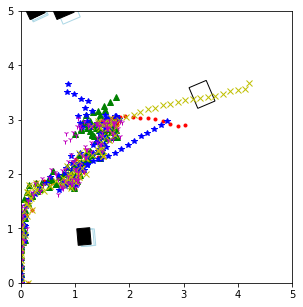

In [8]:
print("execution time=", end-start)
print(j)

df=pd.DataFrame()

df['C1X']=line_x[0]
df['C1Y']=line_y[0]
df['C2X']=line_x[1]
df['C2Y']=line_y[1]
df['C3X']=line_x[2]
df['C3Y']=line_y[2]
df['C4X']=line_x[3]
df['C4Y']=line_y[3]
df['C5X']=line_x[4]
df['C5Y']=line_y[4]
df['O1X']=[i[0] for i in pos[0::4]]
df['O1Y']=[i[1] for i in pos[0::4]]
df['O2X']=[i[0] for i in pos[1::4]]
df['O2Y']=[i[1] for i in pos[1::4]]
df['O3X']=[i[0] for i in pos[2::4]]
df['O3Y']=[i[1] for i in pos[2::4]]
df['O4X']=[i[0] for i in pos[3::4]]
df['O4Y']=[i[1] for i in pos[3::4]] 

fig,ax = plt.subplots(figsize=(5,5))  
ax.set_xlim((0,l))
ax.set_ylim((0,b))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

markers = ["." , "^" , "*" , "x" , "1"]
colors = ['r','g','b','y','m']

for i in range(n_cand): 
    mi = markers[i]
    ci = colors[i]
    ax.plot(line_x[i],line_y[i],mi,linewidth=2,color=ci)

if j>5:
    old_rect=pos[:1]
    next_rect=pos[-5:]
    
    for s in old_rect:
        patch2=plt.Rectangle((s[0], s[1]),s[2],s[3],s[4],fill=False,color="black") 
        ax.add_patch(patch2)  
        
    for s in next_rect:
        patch2=plt.Rectangle((s[0], s[1]),s[2],s[3],s[4],fill=False,color="lightblue") 
        ax.add_patch(patch2)  
        
        
else:
    for s in pos:
        patch2=plt.Rectangle((s[0], s[1]),s[2],s[3],s[4],fill=False,color="lightblue") 
        ax.add_patch(patch2)


for i in range(0,len(vir_rect)): 
    q=vir_rect[i]
    w=rect[i]
    patch=plt.Rectangle((q[0], q[1]),q[2],q[3],q[4],color="black")
    patch1=plt.Rectangle((w[0], w[1]),w[2],w[3],w[4],fill=False,visible=False)
    ax.add_patch(patch1)
    ax.add_patch(patch)
            
plt.savefig('conf1trial1.tif')
df.to_excel('conf1trial1.xlsx', index= False) 
plt.show()

tim.append(end-start)
dist.append(step*j)
itr.append(j)

In [9]:
print(itr)
print(dist)
print(tim)

df=pd.DataFrame()

df['Iteration']=[i for i in itr[0::1]]
df['Distance']=[i for i in dist[0::1]]
df['Time']=[i for i in tim[0::1]]

df.to_excel('Conf1.xlsx', index= False) 

[101, 131]
[14.28355697996826, 18.526197667087544]
[24.508028030395508, 31.593272924423218]
